In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [3]:
students_df = pd.read_csv('students.csv')
students_df

# 1
# find dup
dup_students = students_df[students_df['email'].duplicated(keep=False)].sort_values('email')
dup_students

# keep where there is most data -- the smallest amount of nans
# how to know where is the most / least nans?
# answer: count how many not-nan per row
# 1 a@a  5
# 1 a@a  5
# 1 a@a  3
# 1 a@a  2
# 1 c@c  5
# 1 c@c  5

dup_students['non_nan_count'] = dup_students.notna().sum(axis=1)
dup_students

dup_students.sort_values(['email', 'non_nan_count'], inplace=True, ascending=[True, False])
#display('the duplicates', dup_students)

# now remove dupl, keep only first with highest non-nan-rate
# also keep the removed items
kept = dup_students.drop_duplicates(subset=['email'], keep='first')
kept
# remove from dup_students all rows not belonging to kept
removed = dup_students[~dup_students['id'].isin(kept['id'])]
dup_students.drop_duplicates(subset=['email'], keep='first', inplace=True)
dup_students

display('after remove', dup_students)
display('the removed', removed)
display('the kept', kept)

'after remove'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io,8
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com,8
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com,8
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com,8


'the removed'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
72,73,Jermaine,Gabey,Female,36.0,Jerusalem,Bachelor's degree,ktansleyq@soup.io,8
90,91,Opaline,Satterlee,Female,34.0,Tel Aviv,Master's degree,nlipson12@foxnews.com,8
65,66,Juieta,Bodycote,Female,37.0,Ashkelon,No education,sfullomf@wp.com,8
205,206,Cesar,Lghan,Male,NaN,Tel Aviv,High school,sfullomf@wp.com,7
32,33,Wileen,Thirst,NaN,48.0,Ashkelon,High school,wthirstw@youku.com,7


'the kept'

,id,first_name,last_name,gender,age,city,education,email,non_nan_count
26,27,Kaitlynn,Tansley,Female,39.0,Ashkelon,No education,ktansleyq@soup.io,8
38,39,Neil,Lipson,Male,27.0,Ashkelon,High school,nlipson12@foxnews.com,8
15,16,Sheffie,Fullom,Male,41.0,Haifa,Bachelor's degree,sfullomf@wp.com,8
88,89,Danny,Haythorne,Male,42.0,Tel Aviv,No education,wthirstw@youku.com,8


In [63]:

# using kept and removed from previous ...
# kept Index([26, 38, 15, 88], dtype='int64')
# removed Index([72, 90, 65, 205, 32], dtype='int64')

student_course_df = pd.read_csv('studnet_course.csv')

# modify all removed ids with kewpt ids
student_course_df.sort_values('student_id', inplace=True)
student_course_df

print('kept', kept['id'].values)
print('removed', removed['id'].values)

student_course_df[student_course_df['student_id'].isin(removed['id'])]

# need to make a dict { [id-remove]: id-kept } -- to rename all the student_id of the removed..
# we can make manullay the dict for replace
# i.e. df.replace({10: 40, 20: 40}, inplace=True)
# 1
# student_course_df.replace({
#     73: 27,  # Replace id 73 with 27
#     91: 39,  # Replace id 91 with 39
#     66: 16,  # Replace id 66 with 16
#     206: 16, # Replace id 206 with 16
#     33: 89   # Replace id 33 with 89
# })
# 2 by script

merged_dup = removed.merge(kept, how='inner', on='email', suffixes=('_removed', '_kept'))
mapping_delete = dict(zip(merged_dup['id_removed'], merged_dup['id_kept']))
#merged_dup[['id_removed', 'id_kept']].to_dict(index=False)

pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
student_course_df['student_id'] = student_course_df['student_id'].replace(mapping_delete)
student_course_df
# kept [27 39 16 89]
# removed [ 73  91  66 206  33]

# actaully remove from students df
students_df.drop_duplicates(subset=['email'], keep='first', inplace=True)

kept [27 39 16 89]
removed [ 73  91  66 206  33]


,id,student_id,course_id,final_grade
333,334,1,38,75.0
140,141,1,47,63.0
773,774,2,32,66.0
250,251,2,44,74.0
189,190,2,40,74.0
...,...,...,...,...
629,630,499,3,81.0
218,219,499,24,66.0
690,691,500,13,73.0
612,613,500,5,66.0


In [105]:
# 2. Handle missing data in all datasets:
# a. In case the missing data in a specific column is above 5% of
# all provided data rows fill the missing data with a default valid
# value of your choice.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################################################### per column
# explore na
students_df.isna() # shows bool 
# but how can i see columns which have na
# lets explore gender 

students_df['gender'].notna().sum() # 65 na , 435 notnull
students_df['gender'].isna().sum() # 65 na , 435 notnull

students_df.isna().sum(axis=0)
students_df.isna().sum(axis=0) / students_df.shape[0] * 100

perc_columns = students_df.isna().sum(axis=0) / students_df.shape[0] * 100
perc_columns
replace_columns = perc_columns[(perc_columns > 0 ) & (perc_columns < 60)]  # temp
replace_columns
students_df[replace_columns.index].isna()

# students_df_copy = students_df.copy()
# age_mean = students_df_copy['age'].mean()
# students_df_copy['age'] = students_df_copy['age'].fillna(age_mean)
# display('manually', students_df_copy.head())

# display(students_df)
# 1 in a loop
# for col in replace_columns.index:
#     print(col)
#     # print(students_df[col].value_counts().sort_values(ascending=False))
#     print(students_df[col].mode()[0])
#     max_occur_value = students_df[col].value_counts().sort_values(ascending=False).index[0]
#     students_df[col].fillna(max_occur_value)
# 2 script
students_df[replace_columns.index] = students_df[replace_columns.index].apply(lambda col: col.fillna(col.mode()[0]), axis=0)
students_df

students_copy = students_df.copy()
threshold = len(teachers_df) * 0.05
display("Students Table:", students_df.apply(lambda col: col.fillna("I HATE THIS SHIT!") if col.isnull().sum()>threshold else col.dropna()))
display("Teachers Table:",teachers_df.apply(lambda col: col.fillna("I HATE THIS SHIT!") if col.isnull().sum()>threshold else col.dropna()))
display("Courses Table:",courses_df.apply(lambda col: col.fillna("I HATE THIS SHIT!") if col.isnull().sum()>threshold else col.dropna()))
display("Studnet_Course Table:",student_course_df.apply(lambda col: col.fillna("I HATE THIS SHIT!") if col.isnull().sum()>threshold else col.dropna()))

'Students Table:'

,id,first_name,last_name,gender,age,city,education,email
0,1,Birgit,Mackriell,Female,15.0,Haifa,No education,bmackriell0@china.com.cn
1,2,Cristionna,Ferrick,Female,32.0,Bnei Brak,High school,cferrick1@loc.gov
2,3,Colin,Tite,Male,37.0,Petah Tikva,High school,ctite2@businessinsider.com
3,4,Jonis,Iston,Female,40.0,Jerusalem,High school,jiston3@edublogs.org
4,5,Dex,Goodson,Male,43.0,Haifa,Bachelor's degree,dgoodson4@e-recht24.de
...,...,...,...,...,...,...,...,...
495,496,Karoly,Ferreres,Female,29.0,Haifa,High school,kferreresdr@amazon.de
496,497,Rivkah,Androlli,Female,43.0,Haifa,No education,randrollids@is.gd
497,498,Melisandra,Screen,Female,34.0,Haifa,High school,mscreendt@booking.com
498,499,Delmer,Alpin,Male,37.0,Haifa,High school,dalpindu@cloudflare.com


'Teachers Table:'

,id,first_name,last_name,gender,years_of_experience,salary
0,1,Madlen,Conybear,Female,6,27600.0
1,2,Arty,Noonan,Male,1,12600.0
2,3,Jillayne,Younger,Female,4,22000.0
3,4,Tamarah,Hulcoop,Female,4,21600.0
4,5,Kennett,Bugdale,Male,8,33900.0
5,6,Iago,Wadie,Male,10,40700.0
6,7,Ingram,Deboick,Male,4,I HATE THIS SHIT!
7,8,Theodoric,Ewles,I HATE THIS SHIT!,6,27500.0
8,9,Mona,Hallihan,Female,3,I HATE THIS SHIT!
9,10,Amandy,Huddlestone,Female,5,25200.0


'Courses Table:'

,course_id,course_name,course_category,teacher_id,course_start_date
0,1,Full Stack Developer,Software Development,30.0,2023-08-17
1,2,Cyber,Data Science & Security,I HATE THIS SHIT!,2023-11-27
2,3,Product Manager,Product & Business Strategy,14.0,2023-06-28
3,4,AI Developer,Software Development,16.0,2023-11-21
4,5,DevOps Engineer,Software Development,21.0,2023-01-23
5,6,AI Developer,Software Development,7.0,2023-12-08
6,7,Full Stack Developer,Software Development,I HATE THIS SHIT!,2023-12-17
7,8,AI Developer,Software Development,14.0,2023-03-25
8,9,AI Developer,Software Development,7.0,2023-09-09
9,10,DevOps Engineer,Software Development,10.0,2023-06-17


'Studnet_Course Table:'

,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,I HATE THIS SHIT!
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0
...,...,...,...,...
995,996,48,39,I HATE THIS SHIT!
996,997,269,35,85.0
997,998,75,42,78.0
998,999,21,4,69.0


In [156]:
# b. In case the missing data is below 5% remove the row from
# your calculations and make sure to adjust your other
# datasets accordingly.
# c. In case you found a row with missing data with a mandatory
# column (like id, name, etc...) remove this row from your
# dataset.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

################################################### per row

# explore
#teachers_df[teachers_df.isna().sum(axis=1) > 0]
#student_course_df[student_course_df.isna().sum(axis=1) > 0]
#courses_df[courses_df.isna().sum(axis=1) > 0]
#students_df[students_df.isna().sum(axis=1) > 0] # best

nans_only = students_df.copy()
nans_only = nans_only[nans_only.isna().sum(axis=1) > 0]
nans_only['count_nan_perc %'] = nans_only.isna().sum(axis=1) / len(nans_only.columns) * 100
nans_only['count_nan'] = nans_only.isna().sum(axis=1)
nans_only.sort_values('count_nan', ascending=False)

# nans_only.drop(nans_only[nans_only['count_nan_perc %'] > 15].index, inplace=True)
to_drop = nans_only[nans_only['count_nan_perc %'] > 15]

# remove student courses with the nan students_id
student_course_df.drop(student_course_df[student_course_df['student_id'].isin(to_drop['id'])].index, inplace=True)

student_course_df
#to_drop


,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,NaN
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0
...,...,...,...,...
995,996,48,39,NaN
996,997,269,35,85.0
997,998,75,42,78.0
998,999,21,4,69.0


gender
Male      210
Female    201
Name: count, dtype: int64

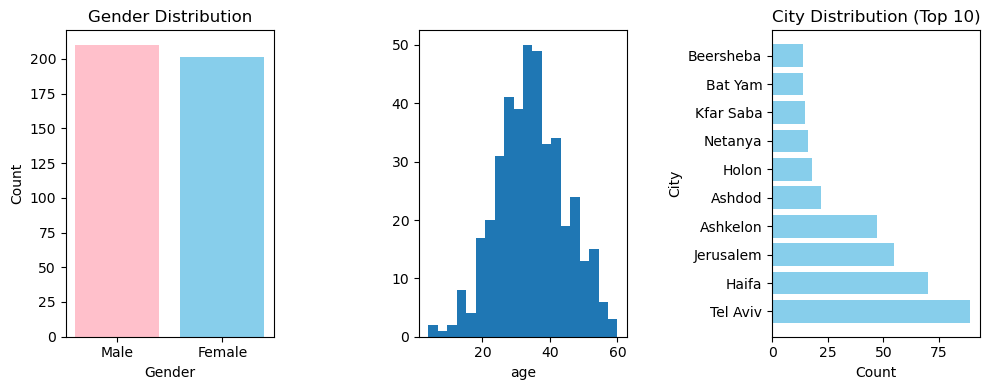

In [165]:
# Data analysis:
# Use the copy() datasets from your data preparation answer and answer
# the following questions:
# 1. Explore the students.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#     a. Count the number of students by gender, show a dataframe
#         with each gender type and how many students we have from
#         that type.
#         Plot bar chart to visualize your result.
#     b. Plot the student ages distribution with histogram chart.
#     c. Find what is the city with the highest number of registered
#         students and what is the city with the lowest number of
#         registered students.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

students_df.dropna(subset=['age'], inplace=True)
students_df.dropna(subset=['gender'], inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(10, 4))

count_by_gender = students_df['gender'].value_counts()
display(count_by_gender)

ax_gender = axes[0]
ax_gender.bar(count_by_gender.index, count_by_gender.values, color = {'pink', 'skyblue'})
ax_gender.set_xlabel("Gender")
ax_gender.set_ylabel("Count")
ax_gender.set_title("Gender Distribution")

ax_age = axes[1]
ax_age.hist(students_df['age'], bins=20)
ax_age.set_xlabel("age")

ax_city = axes[2]
count_by_city = students_df['city'].value_counts().sort_values(ascending=False)
#display(count_by_city.head(3))
ax_city.barh(count_by_city.index[:10], count_by_city.values[:10], color='skyblue')
ax_city.set_xlabel("Count")
ax_city.set_ylabel("City")
ax_city.set_title("City Distribution (Top 10)")

plt.tight_layout(w_pad=3)
plt.show()


,Course Count
course_category,
Data Science & Security,9
Product & Business Strategy,8
Software Development,33


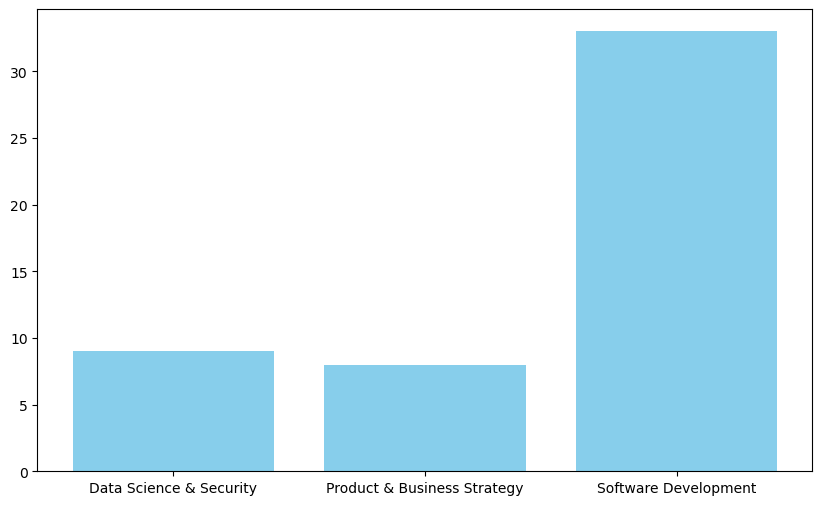

In [171]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#     a. Count the number of courses by category, show a dataframe
#         with each category and how many courses are associated
#         with that category.
#         Plot bar chart to visualize your result.

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

students_df.dropna(subset=['age'], inplace=True)
students_df.dropna(subset=['gender'], inplace=True)

course_counts = courses_df.groupby('course_category').agg({'course_category': 'count'})
course_counts.columns = ['Course Count']
display(course_counts)

plt.figure(figsize=(10, 6))
plt.bar(x=course_counts.index, height=course_counts['Course Count'], color='skyblue')
plt.show()

In [190]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:

#      b. Create a dataframe that shows for each category what are
#         the unique courses names that are associated with that
#         category.

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)


students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

# 1
#courses_df.groupby(['course_category', 'course_name']).count()
#courses_df['course_category'].unique()
#categ = courses_df['course_category'].unique()
#names = pd.DataFrame(data=categ, columns=['course category'])
#names['courses'] = [n for n in categ]
#list(courses_df[courses_df['course_category'] == 'Software Development']['course_name'].unique())
#names['courses'] = [",".join(list(courses_df[courses_df['course_category'] == n]['course_name'].unique())) for n in categ]
#display(names)
# 2
courses_df[['course_category', 'course_name']].drop_duplicates()



,course_category,course_name
0,Software Development,Full Stack Developer
1,Data Science & Security,Cyber
2,Product & Business Strategy,Product Manager
3,Software Development,AI Developer
4,Software Development,DevOps Engineer
13,Software Development,QA


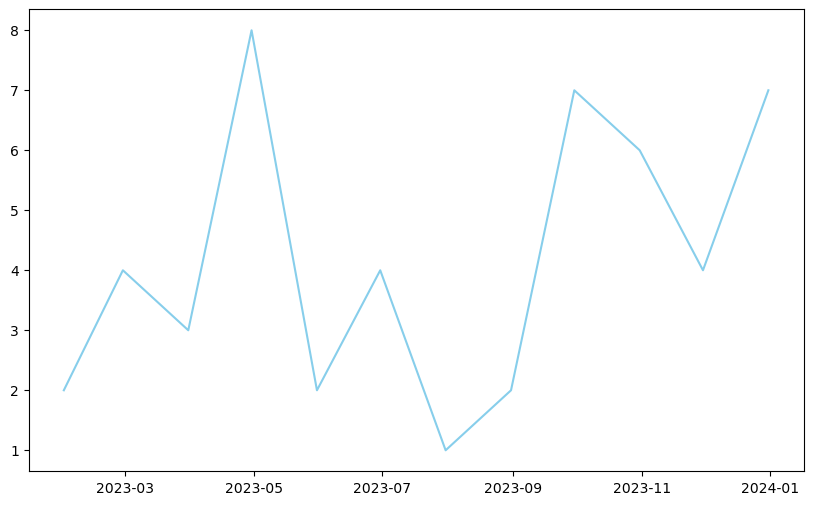

In [212]:
# 2. Explore the coursres.csv dataset and answer the following
#     questions, base your answers with data calculations and
#     visualizations if needed:
#      c. Create a dataframe that shows how many different courses
#         have been started in each month during 2023 year.
#      d. Use the dataframe from the previous exercise (2.c) and
#         create a line chart that represent the trend of the number of

# opened courses during each month (x-axis should be month
# date and y-axis should be number of courses in each month)
pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

#print(courses_df.info())
courses_df['course_start_date'] = pd.to_datetime(courses_df['course_start_date'])
#print(courses_df.info())
courses_df.set_index('course_start_date', inplace=True)

measure_2023 = courses_df[courses_df.index.year == 2023].resample(rule='M').size()
measure_2023
#measure_2023.loc['2023-03']
#measure_2023[measure_2023.index.month == 3]

plt.figure(figsize=(10, 6))
plt.plot(measure_2023.index, measure_2023.values,  color='skyblue')
plt.show()

'mean salary'

'26,721.88'

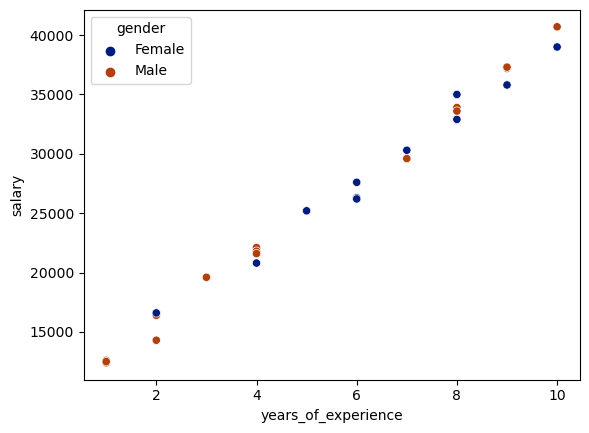

,years_of_experience,salary
years_of_experience,1.000000,0.995859
salary,0.995859,1.000000


In [224]:
# 3
# Explore the teachers.csv dataset and answer the following
# questions, base your answers with data calculations and
# visualizations if needed:
# a. Calculate the mean salary for a teacher in the college.
# b. Plot a scatter plot to find out the correlation between the
# teacher years of experience and its salary.
# Determine according to the plot if there is any correlation
# between them.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

# display('no dups', teachers_df[teachers_df[['first_name', 'last_name']].duplicated()])
display('mean salary', f"{teachers_df['salary'].mean():,.2f}")

sns.scatterplot(x=teachers_df['years_of_experience'], y=teachers_df['salary'], hue=teachers_df['gender'], palette='dark')
#teachers_df
plt.show()
teachers_df[['years_of_experience', 'salary']].corr()

,id,student_id,course_id,final_grade
0,1,247,26,81.0
1,2,113,11,NaN
2,3,125,4,63.0
3,4,455,50,72.0
4,5,140,9,59.0
...,...,...,...,...
995,996,48,39,NaN
996,997,269,35,85.0
997,998,75,42,78.0
998,999,21,4,69.0


,id_x,student_id,course_id,final_grade,id_y,first_name,last_name,gender,age,city,education,email
0,1,247,26,81.0,247,Loren,Shinfield,Male,48.0,Tel Aviv,No education,lshinfield6u@barnesandnoble.com
1,980,247,35,71.0,247,Loren,Shinfield,Male,48.0,Tel Aviv,No education,lshinfield6u@barnesandnoble.com
2,2,113,11,NaN,113,Daffie,Rickerd,Female,42.0,Tel Aviv,Doctoral degree,drickerd34@elpais.com
3,3,125,4,63.0,125,Lindsy,Stuchbury,NaN,51.0,Tel Aviv,High school,lstuchbury3g@google.pl
4,118,125,22,NaN,125,Lindsy,Stuchbury,NaN,51.0,Tel Aviv,High school,lstuchbury3g@google.pl


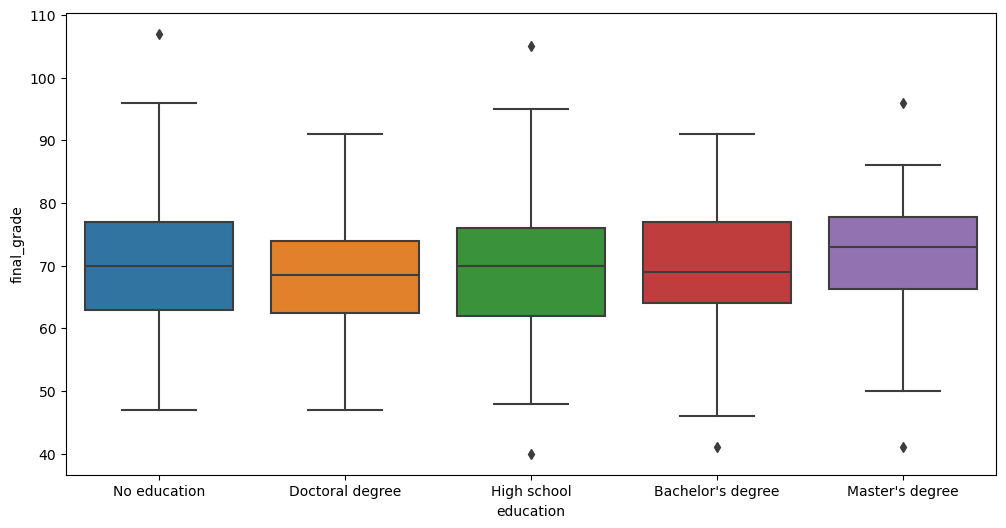

In [259]:
# 4. Use all datasets and answer the following questions:
# a. Find the id, name and salary of the teacher that is teaching
# the most courses during 2023 year.
# In case there are multiple teachers, include them all in your
# answer.
# b. Investigate if there is a linear trend between student
# education level and student grade in the course.
# Use a scatter plot to support your answer.

pd.reset_option('display.max_rows')

students_df = pd.read_csv('students.csv')
#display(students_df.head(5))

student_course_df = pd.read_csv('studnet_course.csv')
#display(student_course_df.head(5))

courses_df = pd.read_csv('courses.csv')
#display(courses_df.head(5))

teachers_df = pd.read_csv('teachers.csv')
#display(teachers_df.head(5))

######################### a

courses_df['course_start_date'] = pd.to_datetime(courses_df['course_start_date'])
courses_2023 = courses_df[courses_df['course_start_date'].dt.year == 2023]
courses_2023

merged = courses_2023.merge(teachers_df, how='inner', left_on='teacher_id', right_on='id')
#merged[['teacher_id', 'first_name', 'last_name']].value_counts().sort_values(ascending=False).head(3)
#display('max', merged['teacher_id'].value_counts().sort_values(ascending=False).values[0])

max_courses = merged['teacher_id'].value_counts().max()  # how many courses teached by same teacher == 3

count_courses = merged['teacher_id'].value_counts()
count_courses
max_ids = count_courses[count_courses == max_courses].index
max_ids
teachers_df[teachers_df['id'].isin(max_ids)]

#cour_cnt = merged.groupby('teacher_id').count()['course_id'] 
#cour_cnt
#max_cnt = cour_cnt.max()
#id_list = cour_cnt[cour_cnt == max_cnt].index.to_list()
#merged[merged['id'].isin(id_list)]


################### b
display(student_course_df)
merged_stduents = student_course_df.merge(students_df, how='inner', left_on='student_id', right_on='id')
display(merged_stduents.head())

plt.figure(figsize=(12, 6))

#sns.scatterplot(x=merged_stduents['student_id'], y=merged_stduents['final_grade'], hue=merged_stduents['education'])
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xlabel("Students")
#plt.xticks([])  
# better ?
# sns.boxplot(x=merged_stduents['education'], y=merged_stduents['final_grade'])
# plt.xlabel("Education Level")
# plt.ylabel("Final Grade")
# plt.title("Distribution of Grades by Education Level")
# plt.xticks(rotation=45)
# plt.show()


sns.boxplot(x=merged_stduents['education'], y=merged_stduents['final_grade'])

plt.show()
